# Problem Definition

The mobile game "Cookie Cats" is a freenium game where users can play for free but are asked to make in-app purchases to improve their in-game experience. This notebook explores the effect of an A/B test—moving the first user "gate" from level 30 to level 40—on player retention.

# Data Exploration

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/cookie_cats.csv')

In [6]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [30]:
df.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

## Understanding the Features

Our two groups can be identified by the field "version," while our target is retention_7

- **version:** Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
- **sum_gamerounds:** The number of game rounds played by the player during the first 14 days after install.
- **retention_1:** Did the player come back and play 1 day after installing?
- **retention_7:** Did the player come back and play 7 days after installing?

In [32]:
df.describe(include='all')

,userid,version,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189,90189.000000,90189,90189
unique,NaN,2,NaN,2,2
top,NaN,gate_40,NaN,False,False
freq,NaN,45489,NaN,50036,73408
mean,4.998412e+06,NaN,51.872457,NaN,NaN
std,2.883286e+06,NaN,195.050858,NaN,NaN
min,1.160000e+02,NaN,0.000000,NaN,NaN
25%,2.512230e+06,NaN,5.000000,NaN,NaN
50%,4.995815e+06,NaN,16.000000,NaN,NaN
75%,7.496452e+06,NaN,51.000000,NaN,NaN


In [10]:
# split the dataset into a and b groups
# so we can confirm random assignment
a = df[df['version'] == 'gate_30']
b = df[df['version'] == 'gate_40']

In [28]:
a.describe()

,userid,sum_gamerounds
count,4.470000e+04,44700.000000
mean,4.987564e+06,52.456264
std,2.881026e+06,256.716423
min,1.160000e+02,0.000000
25%,2.505469e+06,5.000000
50%,4.983631e+06,17.000000
75%,7.481497e+06,50.000000
max,9.999710e+06,49854.000000


In [29]:
b.describe()

,userid,sum_gamerounds
count,4.548900e+04,45489.000000
mean,5.009073e+06,51.298776
std,2.885496e+06,103.294416
min,3.770000e+02,0.000000
25%,2.517171e+06,5.000000
50%,5.007329e+06,16.000000
75%,7.510762e+06,52.000000
max,9.999861e+06,2640.000000


### Confirming Random Assignment Using Kolmogorov-Smirnov 2 Sample Test

In [34]:
from scipy.stats import ks_2samp
import numpy as np

In [36]:
ks_2samp(a.sum_gamerounds, b.sum_gamerounds)

Ks_2sampResult(statistic=0.010270735856046653, pvalue=0.017190150793918755)

### Were the A/B Groups Truly Random?

Given the p-value = 1.72%, there is a 1.72% change that these 2 samples came from the same population given the difference in distributions of the number of rounds played. While this can indicate that our users were not properly bucketed into sample groups, if the groups were chosen at player sign-up this can be a side-effect of our intervention. 

Unfortunately, it looks like we can't confirm with certainty that our random assignment was truly random. For now, we will continue under the assumption that any differences in samples we observe—including in the sum_gamerounds feature—is a function of our intervention.

## Exploratory Data Analysis

In [8]:
import seaborn as sns

In [12]:
len(a)

44700

In [13]:
len(b)

45489

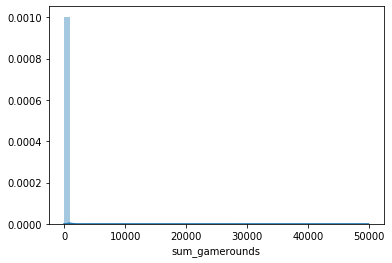

In [20]:
# Distribution is highly skewed to the right, making this distribution
# difficult to analyze
sns.distplot(a['sum_gamerounds']);

In [23]:
# Identifying how many datapoints will be covered
# if we only show the first 100 rounds
round(len(a[a['sum_gamerounds'] < 100]) / len(a),2)

0.86

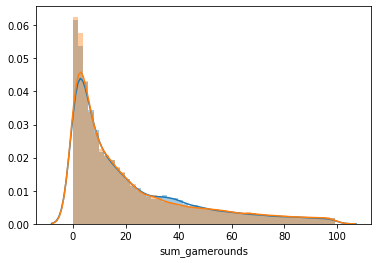

In [25]:
sns.distplot(a[a['sum_gamerounds'] < 100]['sum_gamerounds'])
sns.distplot(b[b['sum_gamerounds'] < 100]['sum_gamerounds']);